# Part I - (Dataset Exploration Title)
## by Henrique Cesario

## Introduction
> Introduce the dataset





## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
from matplotlib import rcParams

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [4]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

>Need to change the types of some columns:

>Start time and end time type should be datetime.

>ids columns should be object

>member gender should be category

>Make a column for day of the week for visualization later


In [8]:
df_clean = df.copy()

In [9]:
types = {
    'bike_id' : 'object',
    'start_station_id' : 'object',
    'end_station_id' : 'object',
    'start_time' : 'datetime64',
    'end_time' : 'datetime64',
    'member_gender' : 'category',

}

In [10]:
df_clean = df_clean.astype(types)

df_clean['only_date_start'] = pd.to_datetime(df['start_time']).dt.date
df_clean['only_date_end'] = pd.to_datetime(df['end_time']).dt.date

In [13]:
df_clean['day_of_week_start'] = df_clean['start_time'].dt.day_name()

df_clean['day_of_week_end'] = df_clean['end_time'].dt.day_name()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week_start,day_of_week_end
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,Friday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,Friday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,Friday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,Friday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,Friday,Friday
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,Friday,Friday
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,Friday,Friday
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,Friday,Friday


In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> The dataframe has 183412 entries, with 16 columns

### What is/are the main feature(s) of interest in your dataset?

> The duration of each trip, what is the most type of users use the service, the distance traveled and the gender of the users

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec, member_gender, latitude and longitude

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


#### Time in general of each user

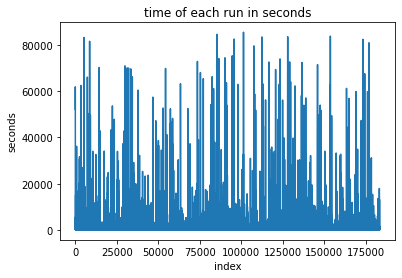

In [14]:
plt.plot(df_clean['duration_sec']);
plt.title('time of each run in seconds');
plt.ylabel('seconds');
plt.xlabel('index');
rcParams['figure.figsize'] = 10,6


most entries don't pass the 80000 seconds mark

#### What is the gender ratio?

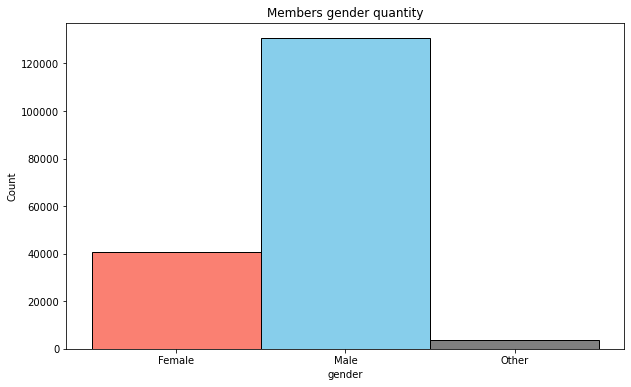

In [15]:
ax = sb.histplot(df_clean['member_gender']);
ax.patches[0].set_facecolor('salmon')
ax.patches[1].set_facecolor('skyblue')
ax.patches[2].set_facecolor('gray')
plt.title('Members gender quantity');
plt.xlabel('gender');


The majority of the users are male

#### quantity of customer and subscribers?

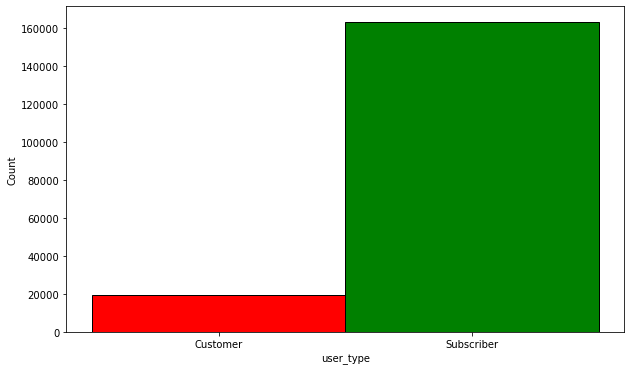

In [16]:
ax = sb.histplot(df_clean['user_type']);
ax.patches[0].set_facecolor('red')
ax.patches[1].set_facecolor('green')

There are way more users that are subscribed to the service

#### how many are interested in the bike share function?

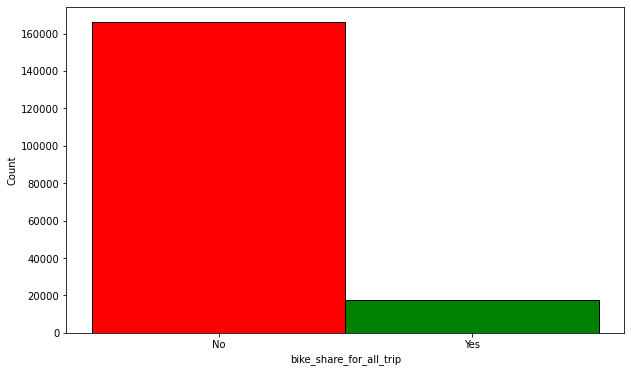

In [17]:
ax = sb.histplot(df_clean['bike_share_for_all_trip']);
ax.patches[0].set_facecolor('red')
ax.patches[1].set_facecolor('green')

most users don't seem to use the bike share 

days = df_clean['day_of_week_start'].tolist()

days = days.sort()

days = df_clean['day_of_week_start'].value_counts().index
counts = df_clean['day_of_week_start'].value_counts().values

#### days of the week most popular to use?

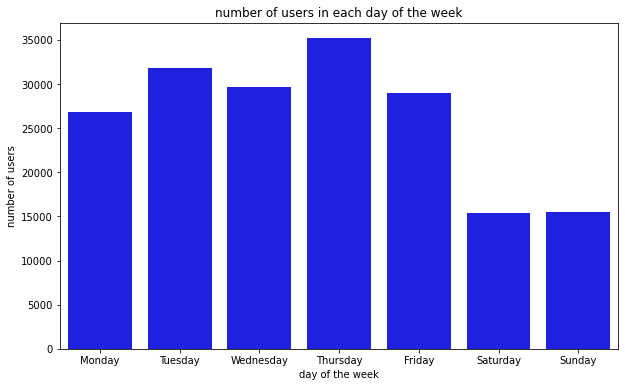

In [20]:
ax = sb.countplot(data = df_clean, x = 'day_of_week_start',order = weekdays,color = 'blue')
plt.title('number of users in each day of the week');
plt.xlabel('day of the week');
plt.ylabel('number of users');

#### The most popular stations?

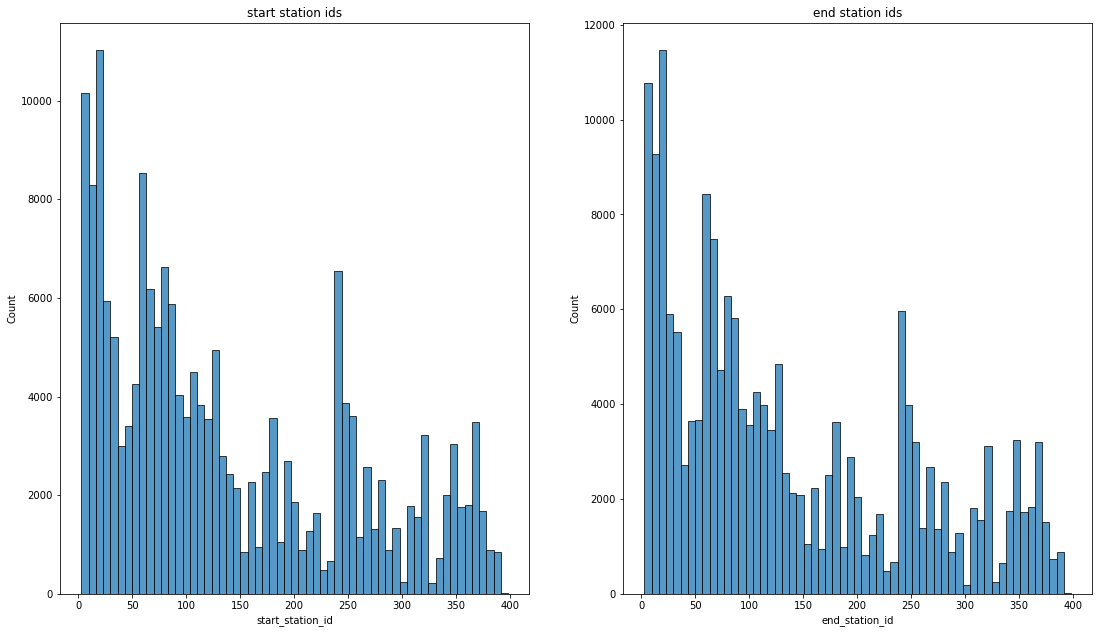

In [21]:
figure, ax = plt.subplots(1, 2)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.subplot(1, 2, 1)
plt.title('start station ids')
ax = sb.histplot(df_clean['start_station_id']);

plt.subplot(1, 2, 2)
plt.title('end station ids')
ax = sb.histplot(df_clean['end_station_id']);


The start and end stations most frequent used looks the same

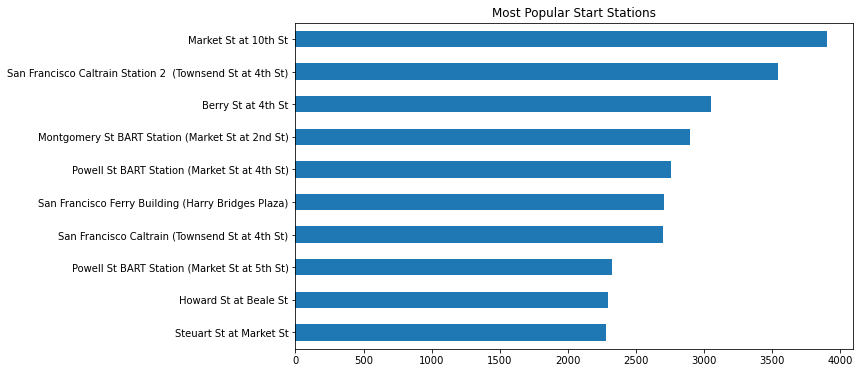

In [22]:
plt.title('Most Popular Start Stations')
df_clean.start_station_name.value_counts(ascending=True).tail(10).plot.barh();

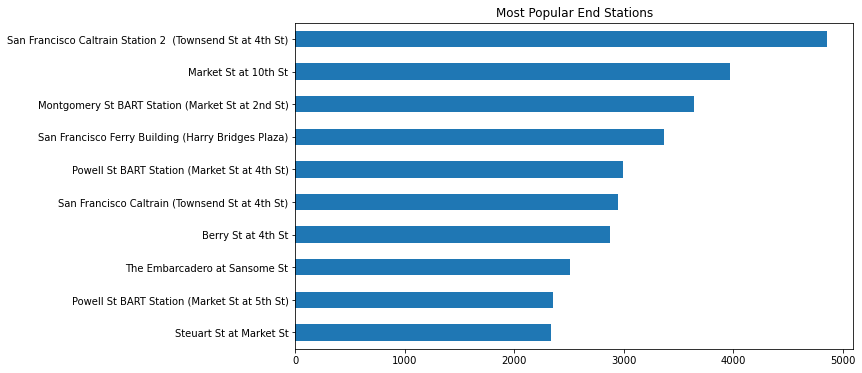

In [23]:
plt.title('Most Popular End Stations')
df_clean.end_station_name.value_counts(ascending=True).tail(10).plot.barh();

But there actually a few small differences between the most popular to start and the most popular to end

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> It was necessary to make some changes in the dates columns during wrangling so it would be easier to visualize the information later

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> using only the ids it looks like the start and end stations are the same in quantity but that's not the case

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [24]:
def average_time_graph(x1):
    user_time = df_clean[[x1, 'duration_sec']].groupby(x1).mean().sort_values("duration_sec")
    ax = user_time.plot(kind='barh', figsize=(10,6), fontsize=13);
    ax.get_legend().remove() 
    plt.xlabel('seconds');
    for i, v in enumerate(user_time['duration_sec']):
        ax.text(v, i , str(math.trunc(v)), color='black', fontweight='bold')



#### Comparing the average type with other variables

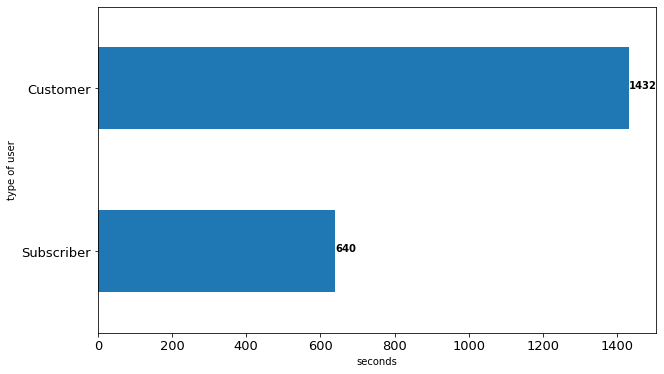

In [25]:
average_time_graph('user_type')
ax.set_title('Average time of run per type of user');
plt.ylabel('type of user');


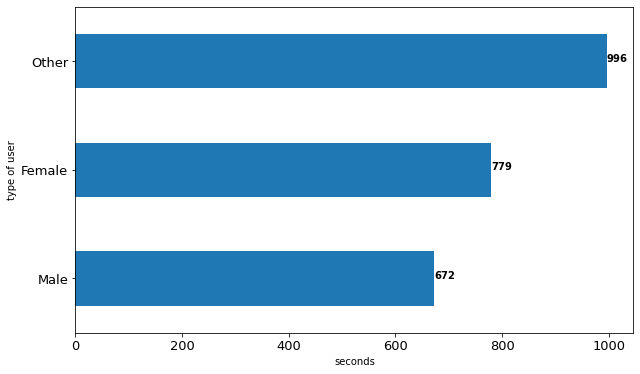

In [26]:
average_time_graph('member_gender')
ax.set_title('Average time of run per gender');
plt.ylabel('type of user');

females appear to run longer than males. On the other hand users that don't qualify as either of those or prefer to not give the information run even longer

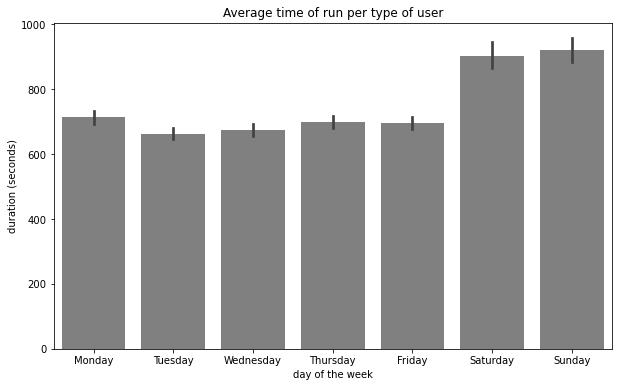

In [27]:
ax = sb.barplot(data = df_clean, x = 'day_of_week_start', y = 'duration_sec', order = weekdays,color = 'gray')
plt.ylabel('seconds');
plt.title('Average time of run per type of user');
plt.xlabel('day of the week');
plt.ylabel('duration (seconds)');

The runs are longer on the weekends

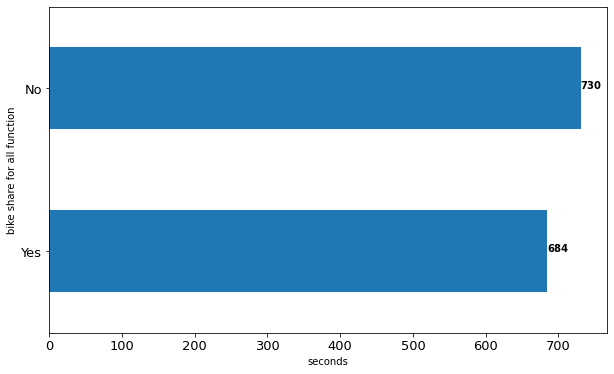

In [28]:
average_time_graph('bike_share_for_all_trip')
ax.set_title('Average time of run of bike share function trip');
plt.ylabel('bike share for all function');

this plot doesn't tell much

#### Gender ratio depending on type of user?

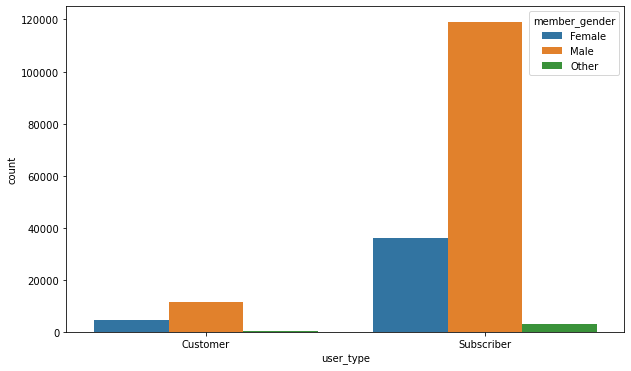

In [29]:
sb.countplot(data = df_clean, x = 'user_type', hue = 'member_gender');

In [30]:
df_clean.query("member_gender == 'Other' & user_type == 'Customer'")

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week_start,day_of_week_end
2032,272,2019-02-28 18:30:50.097,2019-02-28 18:35:22.852,182.0,19th Street BART Station,37.809013,-122.268247,232.0,MLK Jr Way at 14th St,37.806163,-122.276040,5613,Customer,1983.0,Other,No,Thursday,Thursday
2269,442,2019-02-28 18:14:11.647,2019-02-28 18:21:33.758,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,241.0,Ashby BART Station,37.852477,-122.270213,5605,Customer,1993.0,Other,No,Thursday,Thursday
2443,1081,2019-02-28 17:55:14.098,2019-02-28 18:13:15.208,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,4944,Customer,1984.0,Other,No,Thursday,Thursday
2754,654,2019-02-28 17:46:53.121,2019-02-28 17:57:47.972,24.0,Spear St at Folsom St,37.789677,-122.390428,343.0,Bryant St at 2nd St,37.783172,-122.393572,1458,Customer,1974.0,Other,No,Thursday,Thursday
2925,1403,2019-02-28 17:27:21.305,2019-02-28 17:50:44.540,361.0,Mendell St at Fairfax Ave,37.739853,-122.385655,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5107,Customer,1986.0,Other,No,Thursday,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180501,2800,2019-02-01 10:12:58.539,2019-02-01 10:59:39.349,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5382,Customer,1983.0,Other,No,Friday,Friday
180819,457,2019-02-01 10:00:56.514,2019-02-01 10:08:34.307,100.0,Bryant St at 15th St,37.767100,-122.410662,80.0,Townsend St at 5th St,37.775235,-122.397437,5318,Customer,1991.0,Other,No,Friday,Friday
181780,1385,2019-02-01 08:38:22.144,2019-02-01 09:01:27.935,270.0,Ninth St at Heinz Ave,37.853489,-122.289415,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,5493,Customer,1983.0,Other,No,Friday,Friday
181981,341,2019-02-01 08:44:01.617,2019-02-01 08:49:42.643,274.0,Oregon St at Adeline St,37.857567,-122.267558,246.0,Berkeley Civic Center,37.869060,-122.270556,4890,Customer,1994.0,Other,No,Friday,Friday


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Even though the service has less users during the weekends, those users are the ones that have the longest time using it. Maybe thats why it has less users using?


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Can we find out the distance traveled?

In [31]:
#this code was copied from
#https://www.geeksforgeeks.org/program-distance-two-points-earth/#:~:text=For%20this%20divide%20the%20values,is%20the%20radius%20of%20Earth.
#to calculate the distance using longitude and latitude
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

In [32]:
#using the 4 variables to make a distance column
df_clean['distance'] = df_clean.apply(lambda x: distance(x.start_station_latitude,x.end_station_latitude,x.start_station_longitude,x.end_station_longitude), axis=1)

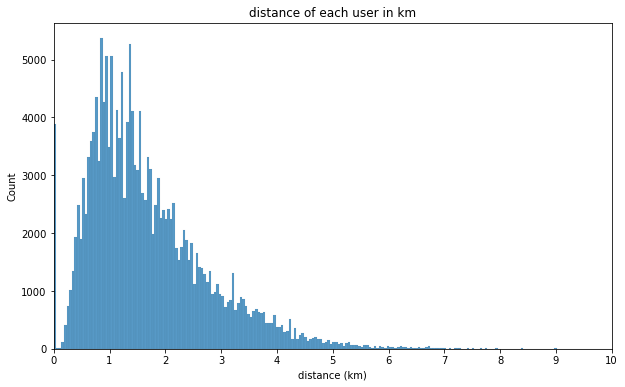

In [33]:
ax = sb.histplot(df_clean['distance']);
plt.xlabel('distance (km)');
plt.title('distance of each user in km');
plt.xticks([0,1,2,3,4,5,6,7,8,9,10]);
plt.xlim(0,10);

most of the runs are smaller than 2km

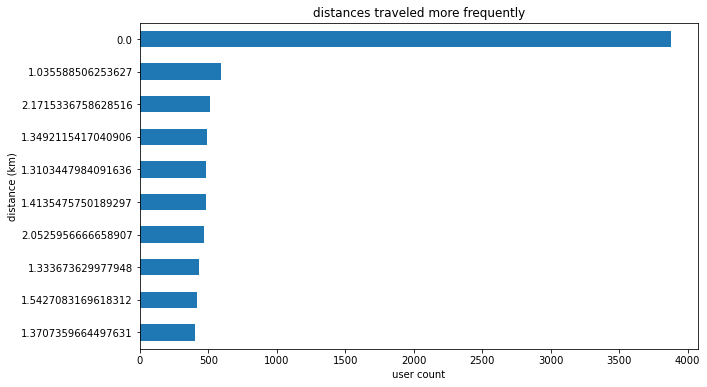

In [34]:
plt.title('distances traveled more frequently')
df_clean.distance.value_counts(ascending=True).tail(10).plot.barh();
plt.xlabel('user count')
plt.ylabel('distance (km)');

In [35]:
df_clean[df_clean['distance']>0].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            183402, 183403, 183404, 183405, 183406, 183407, 183408, 183409,
            183410, 183411],
           dtype='int64', length=179532)

Some People stop in the same place they started so in the end calculating the distance is not possible for all cases. 
179532 out of the 183412 rows have a distance.
Most users seem to travel around 1km

In [36]:
df_clean.sort_values(by=['distance']).tail(10).distance

89787     11.531223
138857    11.550564
85529     11.707442
84701     12.325638
121514    12.409551
87602     13.590843
153112    13.894462
50859     14.099709
19827     15.673955
112038    69.469241
Name: distance, dtype: float64

one user in particular traveled way more than the others

#### What day of the week has more time and what gender use it more?

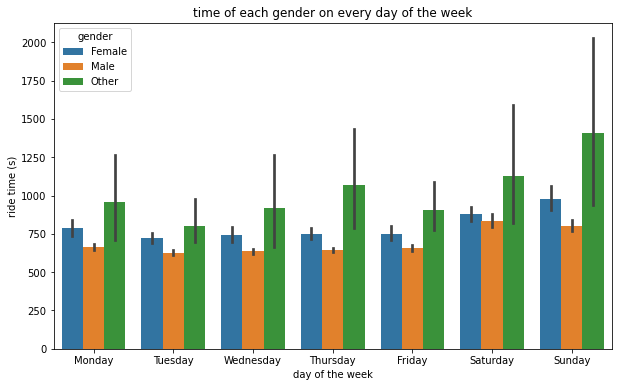

In [37]:
ax = sb.barplot(data = df_clean, x = 'day_of_week_start', y = 'duration_sec', hue = 'member_gender', order = weekdays )
ax.legend( title = 'gender')
plt.xlabel('day of the week');
plt.ylabel('ride time (s)');
plt.title('time of each gender on every day of the week');

everyday the 'other' gender type is the one with the most time using followed by female.

#### What is the time depending on the gender and the type of user?

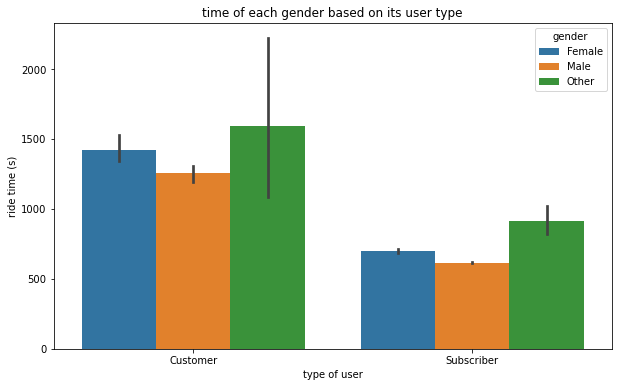

In [38]:
ax = sb.barplot(data = df_clean, x = 'user_type', y = 'duration_sec', hue = 'member_gender')
ax.legend( title = 'gender')
plt.xlabel('type of user');
plt.ylabel('ride time (s)');
plt.title('time of each gender based on its user type');

this plot doesn't give any unexpected results based on what we have seen so far

#### What is the distance based on the type of user and gender?

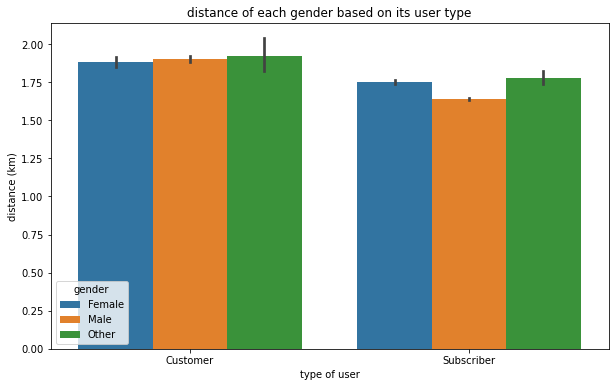

In [39]:
ax = sb.barplot(data = df_clean, x = 'user_type', y = 'distance', hue = 'member_gender')
ax.legend( title = 'gender')
plt.xlabel('type of user');
plt.ylabel('distance (km)');
plt.title('distance of each gender based on its user type');

#### What is the distance based on the day of the week and the type of user?

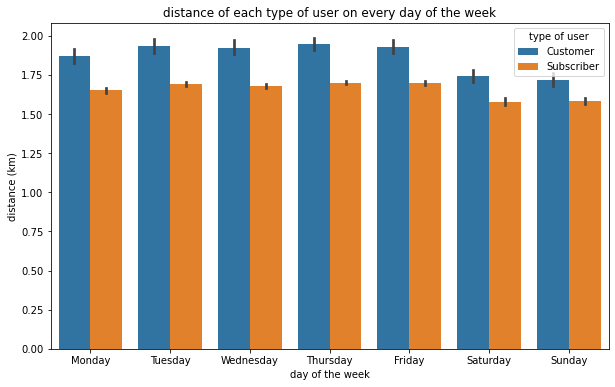

In [41]:
ax = sb.barplot(data = df_clean, x = 'day_of_week_start', y = 'distance', hue = 'user_type',order = weekdays)
ax.legend( title = 'type of user')
plt.xlabel('day of the week');
plt.ylabel('distance (km)');
plt.title('distance of each type of user on every day of the week');

even though the weekends have more time in seconds on rides, it makes sense that it has less distance in total then others because it has less users in total using the service, as seen on the other graphs

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Depending on the user gender or if he's a customer or subscriber can make him more likely to have longer times on a bike

### Were there any interesting or surprising interactions between features?

> I didn't count on some users having 0 distance because they ended up where they started or didn't run at all. The other distance problably aren't as precise either because it's just the start and end point. It doesn't take in account the route made

## Conclusions
> Customers have more time using the service than subscribers, and users with 'other' as gender are the ones that have the most time using it even though they are the minority of users.
Weekends are the days that have the least amount of users but these users are the ones that ride for the longest time



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

